## Titanic data and visualization

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set_style('whitegrid')

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
titanic = sns.load_dataset('titanic')
titanic.shape
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [4]:
titanic.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')

In [24]:
# titanic['class'].unique()
# Make a function to convert the str value of class to numerical

def class_convert(x):
    if x == 'First':
        return 1
    elif x == 'Second':
        return 2
    elif x == 'Third':
        return 3

titanic['class_num'] = titanic['class'].apply(class_convert)

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone', 'class_num'],
      dtype='object')

In [29]:
titanic.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [33]:
titanic.groupby('sex').count()

,survived,pclass,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,class_num
sex,,,,,,,,,,,,,,,
female,314,314,261,314,314,314,312,314,314,314,97,312,314,314,314
male,577,577,453,577,577,577,577,577,577,577,106,577,577,577,577


In [34]:
titanic.groupby('class').count()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,who,adult_male,deck,embark_town,alive,alone,class_num
class,,,,,,,,,,,,,,,
First,216,216,216,186,216,216,216,214,216,216,175,214,216,216,216
Second,184,184,184,173,184,184,184,184,184,184,16,184,184,184,184
Third,491,491,491,355,491,491,491,491,491,491,12,491,491,491,491


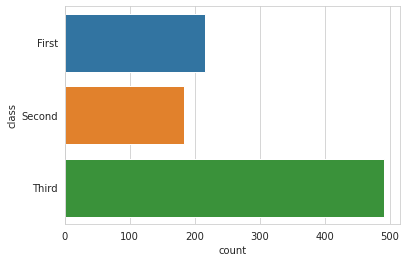

In [36]:
sns.countplot(y='class', data=titanic)

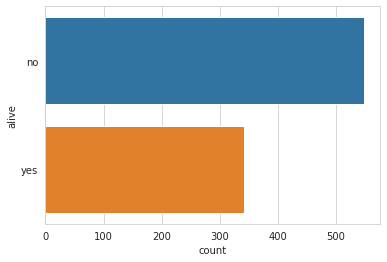

In [37]:
sns.countplot(y='alive', data=titanic)

In [39]:
titanic.groupby('alive').count()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alone,class_num
alive,,,,,,,,,,,,,,,
no,549,549,549,424,549,549,549,549,549,549,549,67,549,549,549
yes,342,342,342,290,342,342,342,340,342,342,342,136,340,342,342


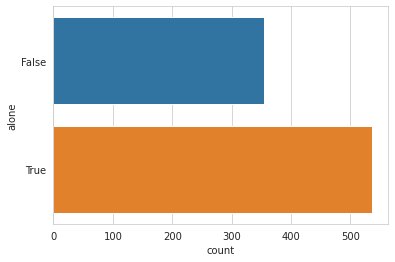

In [41]:
sns.countplot(y='alone', data=titanic)

In [42]:
titanic.groupby('class').std()

,survived,pclass,age,sibsp,parch,fare,adult_male,alone
class,,,,,,,,
First,0.484026,0.0,14.802856,0.611898,0.693997,78.380373,0.498555,0.501140
Second,0.500623,0.0,14.001077,0.601633,0.690963,13.417399,0.499911,0.497081
Third,0.428949,0.0,12.495398,1.374883,0.888861,11.778142,0.477552,0.474233


In [43]:
titanic.groupby('class')['fare'].median()

class
First     60.2875
Second    14.2500
Third      8.0500
Name: fare, dtype: float64

In [47]:
titanic.query("alive == 'yes'")

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,class_num
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,1
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,3
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,1
8,1,3,female,27.0,0,2,11.1333,S,Third,woman,False,NaN,Southampton,yes,False,3
9,1,2,female,14.0,1,0,30.0708,C,Second,child,False,NaN,Cherbourg,yes,False,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
875,1,3,female,15.0,0,0,7.2250,C,Third,child,False,NaN,Cherbourg,yes,True,3
879,1,1,female,56.0,0,1,83.1583,C,First,woman,False,C,Cherbourg,yes,False,1
880,1,2,female,25.0,0,1,26.0000,S,Second,woman,False,NaN,Southampton,yes,False,2
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True,1


In [49]:
titanic.query("alive == 'yes'").groupby('class').count()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,who,adult_male,deck,embark_town,alive,alone,class_num
class,,,,,,,,,,,,,,,
First,136,136,136,122,136,136,136,134,136,136,117,134,136,136,136
Second,87,87,87,83,87,87,87,87,87,87,13,87,87,87,87
Third,119,119,119,85,119,119,119,119,119,119,6,119,119,119,119


In [53]:
titanic.groupby('class')['age'].describe()

,count,mean,std,min,25%,50%,75%,max
class,,,,,,,,
First,186.0,38.233441,14.802856,0.92,27.0,37.0,49.0,80.0
Second,173.0,29.877630,14.001077,0.67,23.0,29.0,36.0,70.0
Third,355.0,25.140620,12.495398,0.42,18.0,24.0,32.0,74.0


In [54]:
titanic.query("alive == 'yes'").groupby('class').describe()

survived                 ...      fare                               
          count mean  std  min  ...       25%      50%         75%       max
class                           ...                                         
First     136.0  1.0  0.0  1.0  ...  50.98545  77.9583  111.481225  512.3292
Second     87.0  1.0  0.0  1.0  ...  13.00000  21.0000   26.250000   65.0000
Third     119.0  1.0  0.0  1.0  ...   7.77500   8.5167   15.875000   56.4958

[3 rows x 48 columns]

In [59]:
titanic.groupby('sex')['age'].aggregate([min, np.median, max])

,min,median,max
sex,,,
female,0.75,27.0,63.0
male,0.42,29.0,80.0


In [61]:
titanic.query("age > 30").groupby('class').median()

,survived,pclass,age,sibsp,parch,fare,adult_male,alone
class,,,,,,,,
First,1,1,45.0,0,0,56.9292,True,False
Second,0,2,39.0,0,0,14.0000,True,True
Third,0,3,38.0,0,0,8.0500,True,True


In [63]:
titanic.query("fare < 30").groupby('class').median()

,survived,pclass,age,sibsp,parch,fare,adult_male,alone
class,,,,,,,,
First,0,1,45.0,0,0,26.550,True,True
Second,0,2,30.0,0,0,13.000,True,True
Third,0,3,25.0,0,0,7.925,True,True


In [67]:
titanic.groupby(['class', 'sex'])['age'].mean().unstack()

sex,female,male
class,,
First,34.611765,41.281386
Second,28.722973,30.740707
Third,21.750000,26.507589


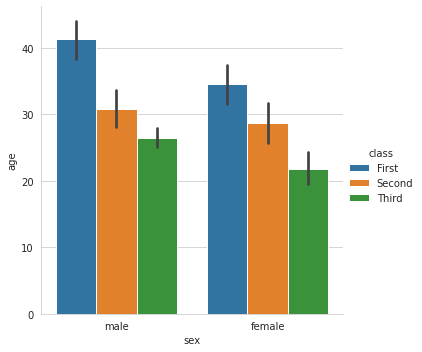

In [69]:
sns.catplot(x='sex', y='age', hue='class', kind='bar', data=titanic)

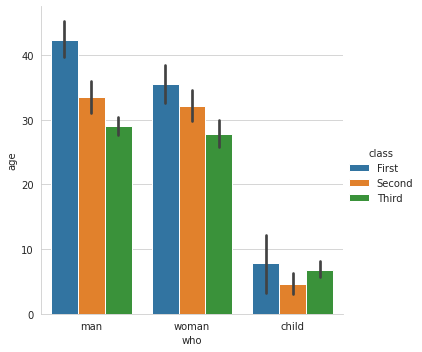

In [70]:
sns.catplot(x='who', y='age', hue='class', kind='bar', data=titanic)

In [71]:
titanic.groupby(['class', 'sex'])['fare'].mean().unstack()

sex,female,male
class,,
First,106.125798,67.226127
Second,21.970121,19.741782
Third,16.118810,12.661633


In [72]:
titanic.groupby(['class', 'who'])['fare'].mean().unstack()

who,child,man,woman
class,,,
First,139.382633,65.951086,104.317995
Second,28.323905,19.054124,20.868624
Third,23.220190,11.340213,15.354351


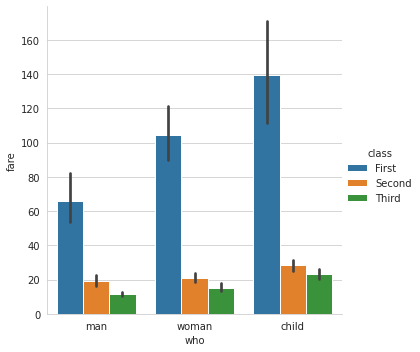

In [73]:
sns.catplot(x='who', y='fare', hue='class', kind='bar', data=titanic)

In [75]:
titanic.groupby(['class', 'who'])['survived'].mean().unstack()

who,child,man,woman
class,,,
First,0.833333,0.352941,0.978022
Second,1.000000,0.080808,0.909091
Third,0.431034,0.119122,0.491228


In [77]:
 titanic.pivot_table('survived', index='class', columns='sex')

sex,female,male
class,,
First,0.968085,0.368852
Second,0.921053,0.157407
Third,0.500000,0.135447


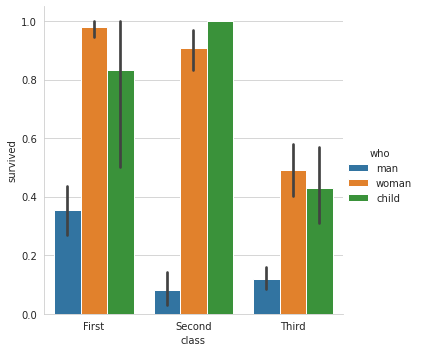

In [78]:
sns.catplot(x='class', y='survived', hue='who', kind='bar', data=titanic)

In [84]:
age = pd.cut(titanic['age'], [0, 20, 40, 60, 80])
titanic.pivot_table('survived', ['sex', age], 'class')

class               First    Second     Third
sex    age                                   
female (0, 20]   0.928571  1.000000  0.510638
       (20, 40]  0.977778  0.911111  0.478261
       (40, 60]  0.958333  0.846154  0.000000
       (60, 80]  1.000000       NaN  1.000000
male   (0, 20]   0.571429  0.526316  0.197368
       (20, 40]  0.500000  0.050847  0.143836
       (40, 60]  0.342105  0.055556  0.074074
       (60, 80]  0.083333  0.333333  0.000000

In [85]:
fare = pd.qcut(titanic['fare'], 3)
titanic.pivot_table('survived', ['sex', age], [fare, 'class'])
# As cabin class reflects the fare automatically, not seeing any significance

fare            (-0.001, 8.662]            ... (26.0, 512.329]          
class                     First     Third  ...          Second     Third
sex    age                                 ...                          
female (0, 20]              NaN  0.692308  ...        1.000000  0.111111
       (20, 40]             NaN  0.529412  ...        1.000000  0.250000
       (40, 60]             NaN  0.000000  ...        1.000000  0.000000
       (60, 80]             NaN       NaN  ...             NaN       NaN
male   (0, 20]              NaN  0.162162  ...        0.666667  0.052632
       (20, 40]             0.0  0.135135  ...        0.000000  0.500000
       (40, 60]             NaN  0.086957  ...        0.000000       NaN
       (60, 80]             NaN  0.000000  ...             NaN       NaN

[8 rows x 8 columns]

In [86]:
titanic.pivot_table('survived', index='who', columns='class', margins=True )

class,First,Second,Third,All
who,,,,
child,0.833333,1.000000,0.431034,0.590361
man,0.352941,0.080808,0.119122,0.163873
woman,0.978022,0.909091,0.491228,0.756458
All,0.629630,0.472826,0.242363,0.383838


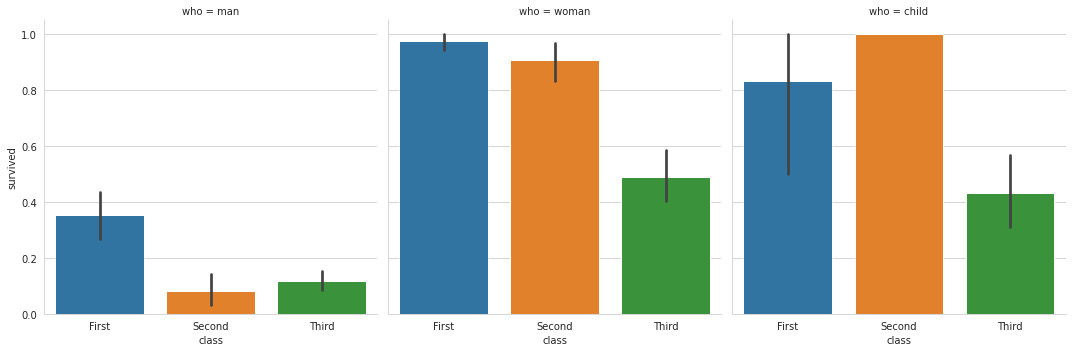

In [87]:
sns.catplot(x='class', y='survived', col='who', kind='bar', data=titanic)

In [88]:
titanic.pivot_table('survived', index='deck', columns='class', margins=True )

class,First,Second,Third,All
deck,,,,
A,0.466667,NaN,NaN,0.466667
B,0.744681,NaN,NaN,0.744681
C,0.593220,NaN,NaN,0.593220
D,0.758621,0.7500,NaN,0.757576
E,0.720000,0.7500,1.0,0.750000
F,NaN,0.8750,0.2,0.615385
G,NaN,NaN,0.5,0.500000
All,0.668571,0.8125,0.5,0.669951


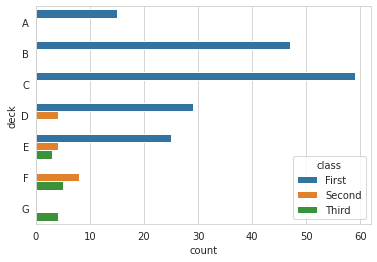

In [90]:
sns.countplot(y='deck', hue='class', data=titanic)

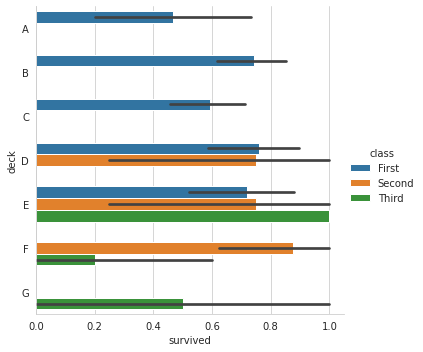

In [91]:
sns.catplot(x='survived', y='deck', hue='class', kind='bar', data=titanic)

In [92]:
titanic.pivot_table('survived', index='embark_town', columns='class', margins=True)

class,First,Second,Third,All
embark_town,,,,
Cherbourg,0.694118,0.529412,0.378788,0.553571
Queenstown,0.500000,0.666667,0.375000,0.389610
Southampton,0.582677,0.463415,0.189802,0.336957
All,0.626168,0.472826,0.242363,0.382452


In [93]:
titanic['embark_town'].unique()

array(['Southampton', 'Cherbourg', 'Queenstown', nan], dtype=object)

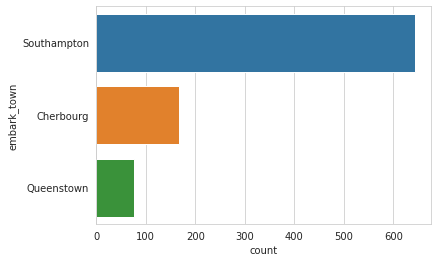

In [94]:
sns.countplot(y='embark_town', data=titanic)

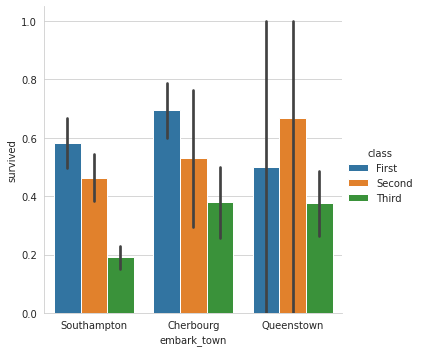

In [95]:
sns.catplot(x='embark_town', y='survived', hue='class', kind='bar', data=titanic)

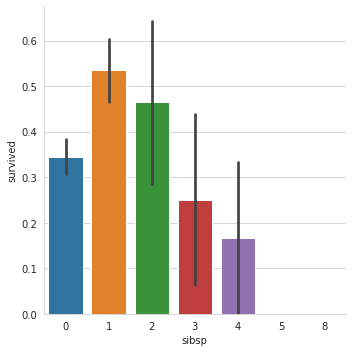

In [97]:
sns.catplot(x='sibsp', y='survived', kind='bar', data=titanic)

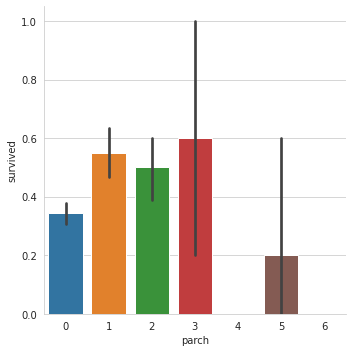

In [98]:
sns.catplot(x='parch', y='survived', kind='bar', data=titanic)